In [1]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from keras.constraints import max_norm
from keras import backend as K
from PIL import Image

K.set_learning_phase(0) #set learning phase
%matplotlib inline

c:\users\narendra\.conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#path = '/home/grads/n/narendra5/Desktop/Programs/LER_machine_learning/'
path = r"C:\\Users\\narendra\\Documents\\LER\\LER_machine_learning\\"

base_model = load_model(path + 'models/' + 'Linenet_image3_round_L2_epoch_2.h5')
layer_dict = dict([(layer.name, layer) for layer in base_model.layers])

In [8]:
sigma = 1.2
alpha = 0.5
Xi = 30
width = 20
space = 40
noise = 2
shift = math.floor(-25 + (width + space/2 + Xi + alpha*10 + sigma*10)%16) 

path = r"C:\\Users\\narendra\\Documents\\LER\\"
original_file = path + 'original_images3\\oim_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
noisy_file = path + 'noisy_images3\\nim_' + "{0:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '_' + str(noise) + '.tiff'


im = np.array(Image.open(original_file))
imnoisy = np.array(Image.open(noisy_file))

im = im/256
imnoisy = (imnoisy)/256
imnoisy = imnoisy[256:512,0:256]
imnoisy = imnoisy.reshape(1,256,256,1)

Gram_1 = np.zeros((16,64,64))

for i in range(1,17):
    layer_name = 'conv2d_' + str(i)
    #layer_name = 'batch_normalization_' + str(i)
    #layer_name = 'dropout_' + str(i)
    
    model = Model(inputs=base_model.input, \
              outputs= base_model.get_layer(layer_name).output)

    
    impredict = model.predict(imnoisy)
    impredict = impredict.reshape(1024,64,64)
    
    features = impredict.reshape(1024*64, 64)
    Gram = np.dot(features.T, features)
    Gram_1[i-1,:,:] = Gram

In [9]:
sigma = 1.2
alpha = 0.5
Xi = 30
width = 20
space = 40
noise = 5
shift = math.floor(-25 + (width + space/2 + Xi + alpha*10 + sigma*10)%16) 

path = r"C:\\Users\\narendra\\Documents\\LER\\"
original_file = path + 'original_images3\\oim_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
noisy_file = path + 'noisy_images3\\nim_' + "{0:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '_' + str(noise) + '.tiff'


im = np.array(Image.open(original_file))
imnoisy = np.array(Image.open(noisy_file))

im = im/256
imnoisy = (imnoisy)/256
imnoisy = imnoisy[256:512,0:256]
imnoisy = imnoisy.reshape(1,256,256,1)

Gram_2 = np.zeros((16,64,64))

for i in range(1,17):
    layer_name = 'conv2d_' + str(i)
    #layer_name = 'batch_normalization_' + str(i)
    #layer_name = 'dropout_' + str(i)
    
    model = Model(inputs=base_model.input, \
              outputs= base_model.get_layer(layer_name).output)

    
    impredict = model.predict(imnoisy)
    impredict = impredict.reshape(1024,64,64)
    
    features = impredict.reshape(1024*64, 64)
    Gram = np.dot(features.T, features)
    Gram_2[i-1,:,:] = Gram

In [10]:
sigma = 1.2
alpha = 0.5
Xi = 30
width = 20
space = 40
noise = 100
shift = math.floor(-25 + (width + space/2 + Xi + alpha*10 + sigma*10)%16) 

path = r"C:\\Users\\narendra\\Documents\\LER\\"
original_file = path + 'original_images3\\oim_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
noisy_file = path + 'noisy_images3\\nim_' + "{0:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '_' + str(noise) + '.tiff'


im = np.array(Image.open(original_file))
imnoisy = np.array(Image.open(noisy_file))

im = im/256
imnoisy = (imnoisy)/256
imnoisy = imnoisy[256:512,0:256]
imnoisy = imnoisy.reshape(1,256,256,1)

Gram_3 = np.zeros((16,64,64))

for i in range(1,17):
    layer_name = 'conv2d_' + str(i)
    #layer_name = 'batch_normalization_' + str(i)
    #layer_name = 'dropout_' + str(i)
    
    model = Model(inputs=base_model.input, \
              outputs= base_model.get_layer(layer_name).output)

    
    impredict = model.predict(imnoisy)
    impredict = impredict.reshape(1024,64,64)
    
    features = impredict.reshape(1024*64, 64)
    Gram = np.dot(features.T, features)
    Gram_3[i-1,:,:] = Gram

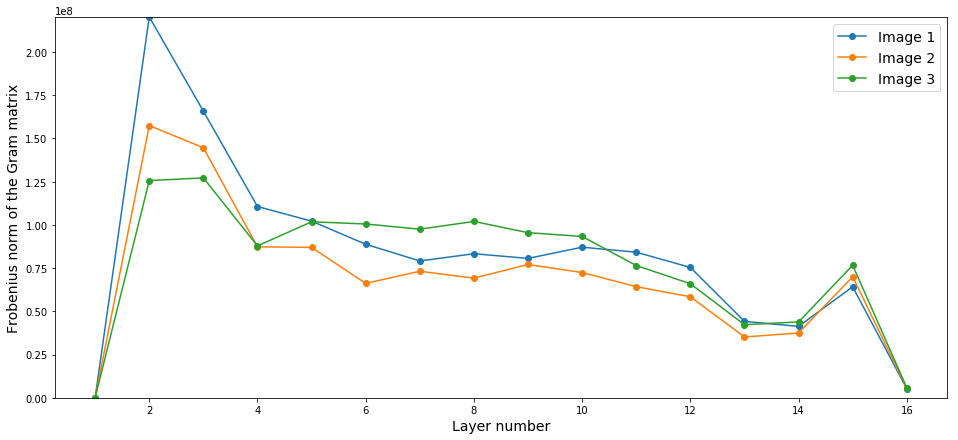

In [11]:
Image_1 = np.zeros((16,))
Image_2 = np.zeros((16,))
Image_3 = np.zeros((16,))

for i in range(1,17):
    Image_1[i-1] = np.linalg.norm((Gram_1)[i-1,:,:],'fro')
    Image_2[i-1] = np.linalg.norm((Gram_2)[i-1,:,:],'fro')
    Image_3[i-1] = np.linalg.norm((Gram_3)[i-1,:,:],'fro')
    
plt.figure(figsize = (16,7))
plt.plot(range(1,17), np.array(Image_1), '-o', label = 'Image 1')
plt.plot(range(1,17), np.array(Image_2),'-o',  label = 'Image 2')
plt.plot(range(1,17), np.array(Image_3),'-o', label = 'Image 3')
plt.legend(fontsize=14)
plt.ylim(0,2.2e8)
plt.xlabel('Layer number', fontsize=14)
plt.ylabel('Frobenius norm of the Gram matrix', fontsize=14)
plt.show()

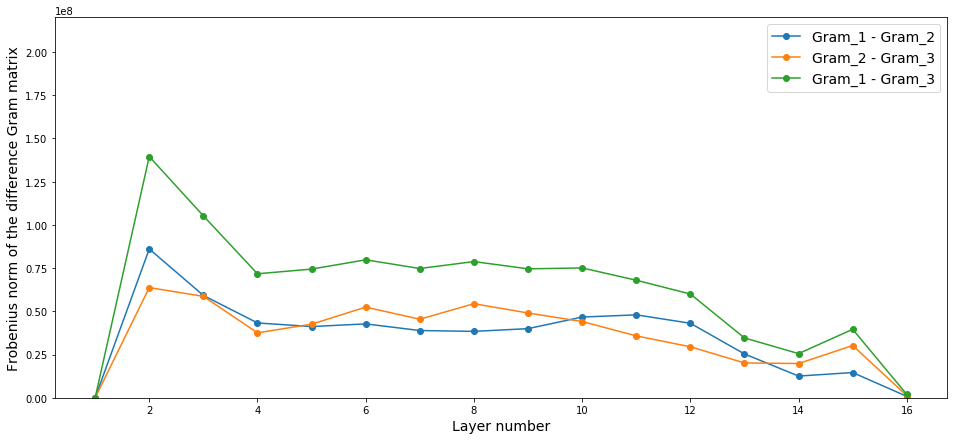

In [12]:
Diff_1 = np.zeros((16,))
Diff_2 = np.zeros((16,))
Diff_3 = np.zeros((16,))

for i in range(1,17):
    Diff_1[i-1] = np.linalg.norm((Gram_1 - Gram_2)[i-1,:,:],'fro')
    Diff_2[i-1] = np.linalg.norm((Gram_2 - Gram_3)[i-1,:,:],'fro')
    Diff_3[i-1] = np.linalg.norm((Gram_1 - Gram_3)[i-1,:,:],'fro')


plt.figure(figsize = (16,7))
plt.plot(range(1,17), Diff_1,'-o', label = 'Gram_1 - Gram_2')
plt.plot(range(1,17), Diff_2,'-o',  label = 'Gram_2 - Gram_3')
plt.plot(range(1,17), Diff_3,'-o', label = 'Gram_1 - Gram_3')
plt.legend(fontsize=14)
plt.ylim(0,2.2e8)
plt.xlabel('Layer number', fontsize=14)
plt.ylabel('Frobenius norm of the difference Gram matrix', fontsize=14)
plt.show()